In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version= 1, as_frame= False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X = mnist["data"]
y = mnist["target"]

In [4]:
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [5]:
some_digit = X[0]

from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsOneClassifier

KN_clf = KNeighborsClassifier(n_neighbors=2, weights='distance')
KN_clf.fit(X_train, y_train)
KN_clf.predict([some_digit]) #should return 5

array([5], dtype=uint8)

In [6]:
from sklearn.model_selection import cross_val_score
cross_val_score(KN_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.96875, 0.96685, 0.96705])

In [11]:
KN_clf = KNeighborsClassifier(n_neighbors=3, weights='distance')
KN_clf.fit(X_train, y_train)
KN_clf.predict([some_digit]) #should return 5

array([5], dtype=uint8)

In [12]:
cross_val_score(KN_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.9704, 0.9689, 0.9687])

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(KN_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.9398, 0.942 , 0.9429])

### Using a scaler made it worse :(

array([5], dtype=uint8)

### Changing weights to 'uniform'

In [16]:
KN_clf = KNeighborsClassifier(n_neighbors=3, weights='uniform')
KN_clf.fit(X_train, y_train)
KN_clf.predict([some_digit]) #should return 5

array([5], dtype=uint8)

In [17]:
cross_val_score(KN_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.969  , 0.96805, 0.9675 ])

### distance is better

In [18]:
KN_clf = KNeighborsClassifier(n_neighbors=3, weights='distance')
KN_clf.fit(X_train, y_train)
KN_clf.predict([some_digit]) #should return 5

array([5], dtype=uint8)

In [22]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(KN_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5821,    5,   15,    4,    0,   20,   44,    3,    8,    3],
       [   1, 6662,   20,   12,    8,    3,   14,   11,    8,    3],
       [  66,   50, 5538,   94,   28,   12,   51,   56,   35,   28],
       [  15,   19,   61, 5748,    5,  102,    6,   70,   69,   36],
       [   4,   62,   45,    5, 5419,   16,   23,   35,   16,  217],
       [  25,   11,   13,  157,    8, 4987,   97,   12,   56,   55],
       [  59,   14,   12,    5,   11,   56, 5753,    1,    7,    0],
       [   9,   53,   27,   16,   62,    2,    0, 5862,    5,  229],
       [  45,   77,   38,  113,   45,  186,   41,   20, 5209,   77],
       [  14,   12,   16,   42,  111,   14,    1,  227,   17, 5495]],
      dtype=int64)

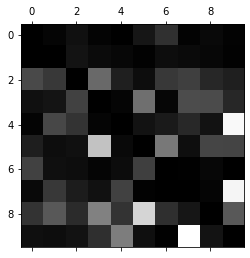

In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt

row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()


ValueError: Expected 2D array, got 1D array instead:
array=[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  45. 103. 254. 254. 255. 184.  73.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  85. 169.
 245. 253. 253. 253. 253. 253. 230.  97.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  91. 233. 253.
 160.  89.  95. 232. 253. 253. 253. 125.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 187. 253. 117.
   7.   0.   6. 136. 242. 253. 251. 112.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 200. 253. 113.
   2.  76.  75. 194. 253. 253. 159.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 177. 253. 239.
 228. 216. 253. 253. 253. 173.  10.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  27. 200. 253.
 253. 253. 253. 253. 253. 102.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   6.  14.
  15. 102. 253. 253. 159.   5.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  41. 216. 253. 190.  19.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  30.
 153. 253. 248.  51.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  94.
 253. 252. 120.  17.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  47. 250.
 252. 148.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  25. 182. 253.
 203.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 206. 253. 220.
  50.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  92. 252. 244. 106.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  50. 226. 241. 109.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  40. 235. 253. 137.  24.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.  15. 208. 253. 190.  29.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.  30. 218. 240. 146.   6.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   4. 160. 167.  70.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [31]:
some_digit = X[33]
KN_clf.predict([some_digit])

array([9], dtype=uint8)